# Exploratory Data Analysis

Understanding the dataset to explore how the data is present in the database and if there is a need of creating some aggregated tables that can help with:
   * Vendor selection for profitability
   * product pricing optimization

In [1]:
import pandas as pd
import sqlite3

In [2]:
# creating database connection
conn = sqlite3.connect('inventory.db')

In [3]:
# checking tables present in the database
tables=pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'",conn)
tables

,name
0,vendor_sales_summary
1,begin_inventory
2,end_inventory
3,purchases
4,purchase_prices
5,sales
6,vendor_invoice


In [4]:
for table in tables['name']:
    
    print('-'*50, f'{table}', '-'*50)
    print('Count of records:', pd.read_sql(f"select count(*) as count from {table}", conn)['count'].values[0])
    display(pd.read_sql(f"select * from {table} limit 5", conn))

-------------------------------------------------- vendor_sales_summary --------------------------------------------------
Count of records: 0


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio


-------------------------------------------------- begin_inventory --------------------------------------------------
Count of records: 206529


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


-------------------------------------------------- end_inventory --------------------------------------------------
Count of records: 224489


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


-------------------------------------------------- purchases --------------------------------------------------
Count of records: 2372474


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


-------------------------------------------------- purchase_prices --------------------------------------------------
Count of records: 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


-------------------------------------------------- sales --------------------------------------------------
Count of records: 12825363


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


-------------------------------------------------- vendor_invoice --------------------------------------------------
Count of records: 5543


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


In [5]:
purchases=pd.read_sql_query("select * from purchases where VendorNumber = 4466",conn)
purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
1,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
2,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
3,38_GOULCREST_5215,38,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-07,2024-01-19,2024-02-26,9.41,6,56.46,1
4,59_CLAETHORPES_5215,59,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.41,6,56.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,81_PEMBROKE_5215,81,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-29,2025-01-04,2025-02-10,9.41,6,56.46,1
2188,62_KILMARNOCK_5255,62,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.35,5,46.75,1
2189,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.41,5,47.05,1
2190,6_GOULCREST_5215,6,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-31,2025-01-04,2025-02-10,9.41,6,56.46,1


In [6]:
purchase_prices=pd.read_sql_query("""select * from purchase_prices where VendorNumber = 4466""",conn)
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [7]:
purchases.groupby(['Brand','PurchasePrice'])[['Quantity','Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
3140,11.19,4640,51921.60
5215,9.41,4923,46325.43
5255,9.35,6215,58110.25


In [8]:
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [9]:
vendor_invoice = pd.read_sql_query(
    "select * from vendor_invoice where VendorNumber = 4466", conn
)
print(vendor_invoice)


    VendorNumber                   VendorName InvoiceDate  PONumber  \
0           4466  AMERICAN VINTAGE BEVERAGE    2024-01-07      8137   
1           4466  AMERICAN VINTAGE BEVERAGE    2024-01-19      8207   
2           4466  AMERICAN VINTAGE BEVERAGE    2024-01-18      8307   
3           4466  AMERICAN VINTAGE BEVERAGE    2024-01-27      8469   
4           4466  AMERICAN VINTAGE BEVERAGE    2024-02-04      8532   
5           4466  AMERICAN VINTAGE BEVERAGE    2024-02-09      8604   
6           4466  AMERICAN VINTAGE BEVERAGE    2024-02-17      8793   
7           4466  AMERICAN VINTAGE BEVERAGE    2024-03-01      8892   
8           4466  AMERICAN VINTAGE BEVERAGE    2024-03-07      8995   
9           4466  AMERICAN VINTAGE BEVERAGE    2024-03-12      9033   
10          4466  AMERICAN VINTAGE BEVERAGE    2024-03-16      9180   
11          4466  AMERICAN VINTAGE BEVERAGE    2024-03-23      9244   
12          4466  AMERICAN VINTAGE BEVERAGE    2024-03-31      9371   
13    

In [10]:
sales = pd.read_sql_query(
    "select * from sales where VendorNo = 4466", conn
)
print(sales)


              InventoryId  Store  Brand                   Description   Size  \
0     1_HARDERSFIELD_5215      1   5215  TGI Fridays Long Island Iced  1.75L   
1     1_HARDERSFIELD_5215      1   5215  TGI Fridays Long Island Iced  1.75L   
2     1_HARDERSFIELD_5215      1   5215  TGI Fridays Long Island Iced  1.75L   
3     1_HARDERSFIELD_5215      1   5215  TGI Fridays Long Island Iced  1.75L   
4     1_HARDERSFIELD_5215      1   5215  TGI Fridays Long Island Iced  1.75L   
...                   ...    ...    ...                           ...    ...   
9448     9_BLACKPOOL_5215      9   5215  TGI Fridays Long Island Iced  1.75L   
9449     9_BLACKPOOL_5255      9   5255  TGI Fridays Ultimte Mudslide  1.75L   
9450     9_BLACKPOOL_5255      9   5255  TGI Fridays Ultimte Mudslide  1.75L   
9451     9_BLACKPOOL_5255      9   5255  TGI Fridays Ultimte Mudslide  1.75L   
9452     9_BLACKPOOL_5255      9   5255  TGI Fridays Ultimte Mudslide  1.75L   

      SalesQuantity  SalesDollars  Sale

In [11]:
sales.groupby('Brand')[['SalesDollars','SalesPrice','SalesQuantity']].sum()

,SalesDollars,SalesPrice,SalesQuantity
Brand,,,
3140,50531.10,30071.85,3890
5215,60416.49,41542.02,4651
5255,79187.04,51180.60,6096


In [12]:
purchases.groupby(['Brand','PurchasePrice'])[['Quantity','Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
3140,11.19,4640,51921.60
5215,9.41,4923,46325.43
5255,9.35,6215,58110.25


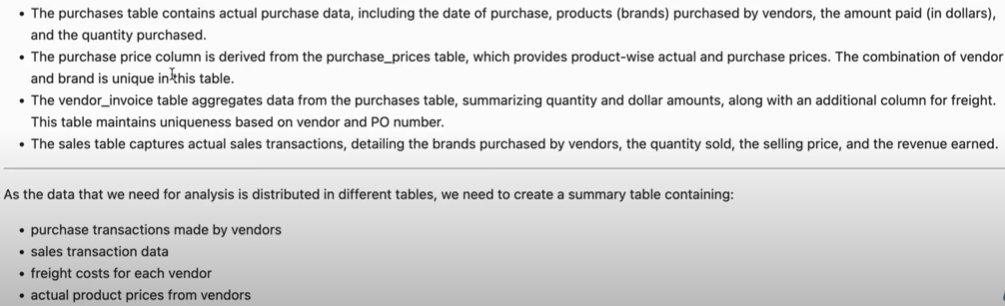

In [13]:
vendor_invoice.columns

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

In [14]:
freight_summary =pd.read_sql_query("""select VendorNumber,SUM(Freight) as FreightCost
From vendor_invoice
Group BY VendorNumber""",conn)

In [15]:
freight_summary

,VendorNumber,FreightCost
0,2,27.08
1,54,0.48
2,60,367.52
3,105,62.39
4,200,6.19
...,...,...
121,98450,856.02
122,99166,130.09
123,172662,178.34
124,173357,202.50


In [16]:
purchases.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
      dtype='object')

In [17]:
purchase_prices.columns

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorNumber', 'VendorName'],
      dtype='object')

In [19]:
pd.read_sql_query("""
SELECT 
    p.VendorNumber,
    p.VendorName,
    p.Brand,
    p.PurchasePrice,
    pp.Volume,
    pp.Price as ActualPrice,
    SUM(p.Quantity) AS TotalPurchaseQuantity,
    SUM(p.Dollars) AS TotalPurchaseDollars
FROM purchases p
JOIN purchase_prices pp
    ON p.Brand = pp.Brand
WHERE p.PurchasePrice > 0
GROUP BY 
    p.VendorNumber,
    p.VendorName,
    p.Brand,
    p.PurchasePrice,
    pp.Volume
ORDER BY TotalPurchaseDollars
""", conn)


,VendorNumber,VendorName,Brand,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars
0,7245,PROXIMO SPIRITS INC.,3065,0.71,50,0.99,1,0.71
1,3960,DIAGEO NORTH AMERICA INC,6127,1.47,200,1.99,1,1.47
2,3924,HEAVEN HILL DISTILLERIES,9123,0.74,50,0.99,2,1.48
3,8004,SAZERAC CO INC,5683,0.39,50,0.49,6,2.34
4,9815,WINE GROUP INC,8527,1.32,750,4.99,2,2.64
...,...,...,...,...,...,...,...,...
10687,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750,29.99,138109,3023206.01
10688,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750,22.99,201682,3261197.94
10689,17035,PERNOD RICARD USA,8068,18.24,1750,24.99,187407,3418303.68
10690,4425,MARTIGNETTI COMPANIES,3405,23.19,1750,28.99,164038,3804041.22


In [20]:
sales.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [21]:
import sqlite3
import pandas as pd

# Always use a context manager
with sqlite3.connect("inventory.db", timeout=30) as conn:
    conn.execute("PRAGMA journal_mode=WAL;")   # enable better concurrency
    df = pd.read_sql_query("""
        SELECT
            VendorNo,
            Brand,
            SUM(SalesDollars) AS TotalSalesDollars,
            SUM(SalesPrice) AS TotalSalesPrice,
            SUM(SalesQuantity) AS TotalSalesQuantity,
            SUM(ExciseTax) AS TotalExciseTax
        FROM sales
        GROUP BY VendorNo, Brand
        ORDER BY TotalSalesDollars DESC
    """, conn)

print(df.head())


Empty DataFrame
Columns: [VendorNo, Brand, TotalSalesDollars, TotalSalesPrice, TotalSalesQuantity, TotalExciseTax]
Index: []


In [21]:
pd.read_sql_query("""SELECT
VendorNo,
Brand,
SUM(SalesDollars) AS TotalSalesDollars,
SUM(SalesPrice) AS TotalSalesPrice,
SUM(SalesQuantity) AS TotalSalesQuantity,
SUM(ExciseTax) AS TotalExciseTax
FROM sales
GROUP BY  VendorNo,
Brand
ORDER BY  TotalSalesDollars
""",conn)

,VendorNo,Brand,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax
0,8004,5287,0.98,0.98,2,0.10
1,9206,2773,0.99,0.99,1,0.05
2,3252,3933,1.98,0.99,2,0.10
3,3924,9123,1.98,0.99,2,0.10
4,10050,3623,1.98,1.98,2,0.10
...,...,...,...,...,...,...
11267,3960,3545,4223107.62,545778.28,135838,249587.83
11268,3960,4261,4475972.88,420050.01,200412,368242.80
11269,17035,8068,4538120.60,461140.15,187140,343854.07
11270,4425,3405,4819073.49,561512.37,160247,294438.66


In [68]:
import time
start = time.time()

final_table = pd.read_sql_query("""
SELECT 
    pp.VendorNumber,
    pp.VendorName,
    pp.Brand,
    pp.Price AS ActualPrice,
    pp.PurchasePrice,
    SUM(s.SalesDollars) AS TotalSalesDollars,
    SUM(s.SalesPrice) AS TotalSalesPrice,
    SUM(s.SalesQuantity) AS TotalSalesQuantity,
    SUM(s.ExciseTax) AS TotalExciseTax,
    SUM(vi.Freight) AS TotalFreightCost,
    SUM(vi.Quantity) AS TotalPurchaseQuantity,
    SUM(vi.Dollars) AS TotalPurchaseDollars
FROM purchase_prices pp
JOIN sales s
    ON pp.VendorNumber = s.VendorNo
   AND pp.Brand = s.Brand
JOIN vendor_invoice vi
    ON pp.VendorNumber = vi.VendorNumber
GROUP BY 
    pp.VendorNumber,
    pp.VendorName,
    pp.Brand,
    pp.Price,
    pp.PurchasePrice
""", conn)

end = time.time()
print("Execution Time:", end - start, "seconds")

    

Execution Time: 0.00870513916015625 seconds


In [22]:

vendor_sales_summary = pd.read_sql_query("""
WITH FreightSummary AS (
  SELECT VendorNumber,
         SUM(Freight) AS FreightCost
  FROM vendor_invoice
  GROUP BY VendorNumber
),

PurchaseSummary AS (
  SELECT 
      p.VendorNumber,
      p.VendorName,
      p.Brand,
      p.Description,
      p.PurchasePrice,
      pp.Price AS ActualPrice,
      pp.Volume,
      SUM(p.Quantity) AS TotalPurchaseQuantity,
      SUM(p.Dollars) AS TotalPurchaseDollars
  FROM purchases p
  JOIN purchase_prices pp
      ON p.Brand = pp.Brand
  WHERE p.PurchasePrice > 0
  GROUP BY 
      p.VendorNumber,
      p.VendorName,
      p.Brand,
      p.PurchasePrice,
      pp.Volume
),
SalesSummary AS (
  SELECT
      VendorNo,
      Brand,
      SUM(SalesDollars) AS TotalSalesDollars,
      SUM(SalesPrice) AS TotalSalesPrice,
      SUM(SalesQuantity) AS TotalSalesQuantity,
      SUM(ExciseTax) AS TotalExciseTax
  FROM sales
  GROUP BY VendorNo, Brand
)

SELECT 
    ps.VendorNumber,
    ps.VendorName,
    ps.Brand,
    ps.Description,
    ps.PurchasePrice,
    ps.ActualPrice,
    ps.Volume,
    ps.TotalPurchaseQuantity,
    ps.TotalPurchaseDollars,
    ss.TotalSalesDollars,
    ss.TotalSalesPrice,
    ss.TotalSalesQuantity,
    ss.TotalExciseTax,
    fs.FreightCost
FROM PurchaseSummary ps
JOIN SalesSummary ss
    ON ps.VendorNumber = ss.VendorNo
   AND ps.Brand = ss.Brand
JOIN FreightSummary fs
    ON ps.VendorNumber = fs.VendorNumber
ORDER BY ps.TotalPurchaseDollars DESC
""", conn)


In [23]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,5101919.51,672819.31,142049,260999.20,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,4819073.49,561512.37,160247,294438.66,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,4538120.60,461140.15,187140,343854.07,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,4475972.88,420050.01,200412,368242.80,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,4223107.62,545778.28,135838,249587.83,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10509,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,15.95,10.96,5,0.55,27100.41
10510,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,65.66,1.47,134,7.04,50293.62
10511,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,1.98,0.99,2,0.10,14069.87
10512,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,143.28,77.61,72,15.12,257032.07


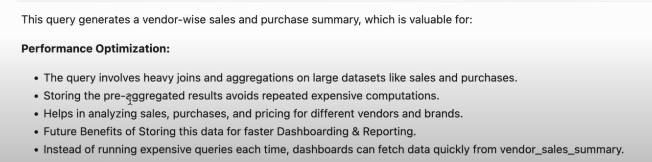

In [32]:
# check clean
vendor_sales_summary.dtypes

VendorNumber               int64
VendorName                object
Brand                      int64
Description               object
PurchasePrice            float64
ActualPrice              float64
Volume                   float64
TotalPurchaseQuantity      int64
TotalPurchaseDollars     float64
TotalSalesDollars        float64
TotalSalesPrice          float64
TotalSalesQuantity         int64
TotalExciseTax           float64
FreightCost              float64
dtype: object

In [25]:
# check null value
vendor_sales_summary.isnull().sum()

VendorNumber             0
VendorName               0
Brand                    0
Description              0
PurchasePrice            0
ActualPrice              0
Volume                   0
TotalPurchaseQuantity    0
TotalPurchaseDollars     0
TotalSalesDollars        0
TotalSalesPrice          0
TotalSalesQuantity       0
TotalExciseTax           0
FreightCost              0
dtype: int64

In [31]:
vendor_sales_summary['VendorName'].unique()

array(['BROWN-FORMAN CORP', 'MARTIGNETTI COMPANIES', 'PERNOD RICARD USA',
       'DIAGEO NORTH AMERICA INC', 'BACARDI USA INC',
       'JIM BEAM BRANDS COMPANY', 'MAJESTIC FINE WINES',
       'ULTRA BEVERAGE COMPANY LLP', 'STOLI GROUP,(USA) LLC',
       'PROXIMO SPIRITS INC.', 'MOET HENNESSY USA INC', 'CAMPARI AMERICA',
       'SAZERAC CO INC', 'CONSTELLATION BRANDS INC', 'M S WALKER INC',
       'SAZERAC NORTH AMERICA INC.', 'PALM BAY INTERNATIONAL INC',
       'REMY COINTREAU USA INC', 'SIDNEY FRANK IMPORTING CO',
       'E & J GALLO WINERY', 'WILLIAM GRANT & SONS INC',
       'HEAVEN HILL DISTILLERIES', 'DISARONNO INTERNATIONAL LLC',
       'EDRINGTON AMERICAS', 'CASTLE BRANDS CORP.',
       'SOUTHERN WINE & SPIRITS NE', 'STE MICHELLE WINE ESTATES',
       'TRINCHERO FAMILY ESTATES', 'MHW LTD', 'WINE GROUP INC',
       'PERFECTA WINES', 'LUXCO INC', 'TREASURY WINE ESTATES',
       'DIAGEO CHATEAU ESTATE WINES', 'SHAW ROSS INT L IMP LTD',
       'PINE STATE TRADING CO', 'PHILLIPS PRO

In [27]:
vendor_sales_summary['Description'].unique()

array(['Jack Daniels No 7 Black', "Tito's Handmade Vodka",
       'Absolut 80 Proof', ..., 'Crown Royal Apple',
       'Concannon Glen Ellen Wh Zin', 'The Club Strawbry Margarita'],
      dtype=object)

In [28]:
vendor_sales_summary['Volume']=vendor_sales_summary['Volume'].astype('float64')

In [29]:
vendor_sales_summary.fillna(0,inplace=True)

In [30]:
# white space remove
vendor_sales_summary['VendorName']=vendor_sales_summary['VendorName'].str.strip()

In [33]:
vendor_sales_summary['VendorName'].unique()

array(['BROWN-FORMAN CORP', 'MARTIGNETTI COMPANIES', 'PERNOD RICARD USA',
       'DIAGEO NORTH AMERICA INC', 'BACARDI USA INC',
       'JIM BEAM BRANDS COMPANY', 'MAJESTIC FINE WINES',
       'ULTRA BEVERAGE COMPANY LLP', 'STOLI GROUP,(USA) LLC',
       'PROXIMO SPIRITS INC.', 'MOET HENNESSY USA INC', 'CAMPARI AMERICA',
       'SAZERAC CO INC', 'CONSTELLATION BRANDS INC', 'M S WALKER INC',
       'SAZERAC NORTH AMERICA INC.', 'PALM BAY INTERNATIONAL INC',
       'REMY COINTREAU USA INC', 'SIDNEY FRANK IMPORTING CO',
       'E & J GALLO WINERY', 'WILLIAM GRANT & SONS INC',
       'HEAVEN HILL DISTILLERIES', 'DISARONNO INTERNATIONAL LLC',
       'EDRINGTON AMERICAS', 'CASTLE BRANDS CORP.',
       'SOUTHERN WINE & SPIRITS NE', 'STE MICHELLE WINE ESTATES',
       'TRINCHERO FAMILY ESTATES', 'MHW LTD', 'WINE GROUP INC',
       'PERFECTA WINES', 'LUXCO INC', 'TREASURY WINE ESTATES',
       'DIAGEO CHATEAU ESTATE WINES', 'SHAW ROSS INT L IMP LTD',
       'PINE STATE TRADING CO', 'PHILLIPS PRO

In [34]:
vendor_sales_summary['GrossProfit'] = vendor_sales_summary['TotalSalesDollars'] - vendor_sales_summary['TotalPurchaseDollars']

In [35]:
vendor_sales_summary['GrossProfit'].min()

-52002.780000000006

In [36]:
vendor_sales_summary['ProfitMargin']= (vendor_sales_summary['GrossProfit']/vendor_sales_summary['TotalSalesDollars'])*100

In [37]:
vendor_sales_summary['StockTurnover'] =vendor_sales_summary['TotalSalesQuantity']/vendor_sales_summary['TotalPurchaseQuantity']

In [38]:
vendor_sales_summary['SalestoPurchaseRatio'] =vendor_sales_summary['TotalSalesDollars']/vendor_sales_summary['TotalPurchaseDollars']

In [39]:
vendor_sales_summary.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesDollars', 'TotalSalesPrice',
       'TotalSalesQuantity', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio'],
      dtype='object')

In [40]:
cursor = conn.cursor()

In [41]:
cursor.execute("""
CREATE TABLE vendor_sales_summary (
    VendorNumber INT,
    VendorName VARCHAR(100),
    Brand VARCHAR(100),
    Description VARCHAR(100),
    PurchasePrice DECIMAL(10,2),
    ActualPrice DECIMAL(10,2),
    Volume DECIMAL(10,2),
    TotalPurchaseQuantity INT,
    TotalPurchaseDollars DECIMAL(15,2),
    TotalSalesDollars DECIMAL(15,2),
    TotalSalesPrice DECIMAL(15,2),
    TotalSalesQuantity INT,
    TotalExciseTax DECIMAL(15,2),
    FreightCost DECIMAL(15,2),
    GrossProfit DECIMAL(15,2),
    ProfitMargin DECIMAL(15,2),
    StockTurnover DECIMAL(15,2),
    SalestoPurchaseRatio DECIMAL(15,2),
    PRIMARY KEY (VendorNumber, Brand)
);
""")


OperationalError: table vendor_sales_summary already exists

In [43]:
pd.read_sql_query("select * from vendor_sales_summary",conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10509,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,15.95,10.96,5,0.55,27100.41,13.31,83.448276,2.500000,6.041667
10510,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,65.66,1.47,134,7.04,50293.62,63.32,96.436186,22.333333,28.059829
10511,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,1.98,0.99,2,0.10,14069.87,0.50,25.252525,1.000000,1.337838
10512,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,143.28,77.61,72,15.12,257032.07,141.81,98.974037,72.000000,97.469388


In [44]:
vendor_sales_summary.to_sql('vendor_sales_summary',conn,if_exists='replace',index=False)

10514

In [25]:
import sqlite3
import pandas as pd
import logging
from ingestion_db import ingest_db   # ✅ correct import

logging.basicConfig(
    filename="logs/get_vendor_summary.log",
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="a"
)

def create_vendor_summary(conn):
    """This function will merge different tables to get the overall vendor summary."""
    vendor_sales_summary = pd.read_sql_query("""
    WITH FreightSummary AS (
      SELECT VendorNumber,
             SUM(Freight) AS FreightCost
      FROM vendor_invoice
      GROUP BY VendorNumber
    ),

    PurchaseSummary AS (
      SELECT 
          p.VendorNumber,
          p.VendorName,
          p.Brand,
          p.Description,
          p.PurchasePrice,
          pp.Price AS ActualPrice,
          pp.Volume,
          SUM(p.Quantity) AS TotalPurchaseQuantity,
          SUM(p.Dollars) AS TotalPurchaseDollars
      FROM purchases p
      JOIN purchase_prices pp
          ON p.Brand = pp.Brand   
      WHERE p.PurchasePrice > 0
      GROUP BY 
          p.VendorNumber,
          p.VendorName,
          p.Brand,
          p.PurchasePrice,
          pp.Volume
    ),

    SalesSummary AS (
      SELECT
          VendorNo,
          Brand,
          SUM(SalesDollars) AS TotalSalesDollars,
          SUM(SalesPrice) AS TotalSalesPrice,
          SUM(SalesQuantity) AS TotalSalesQuantity,
          SUM(ExciseTax) AS TotalExciseTax
      FROM sales
      GROUP BY VendorNo, Brand
    )

    SELECT 
        ps.VendorNumber,
        ps.VendorName,
        ps.Brand,
        ps.Description,
        ps.PurchasePrice,
        ps.ActualPrice,
        ps.Volume,
        ps.TotalPurchaseQuantity,
        ps.TotalPurchaseDollars,
        ss.TotalSalesDollars,
        ss.TotalSalesPrice,
        ss.TotalSalesQuantity,
        ss.TotalExciseTax,
        fs.FreightCost 
    FROM PurchaseSummary ps
    JOIN SalesSummary ss
        ON ps.VendorNumber = ss.VendorNo
       AND ps.Brand = ss.Brand
    JOIN FreightSummary fs
        ON ps.VendorNumber = fs.VendorNumber
    ORDER BY ps.TotalPurchaseDollars DESC
    """, conn)

    return vendor_sales_summary


def clean_data(df):
    """This function will clean the data."""
    df['Volume'] = df['Volume'].astype('float64')
    df.fillna(0, inplace=True)
    df['VendorName'] = df['VendorName'].str.strip()

    df['GrossProfit'] = df['TotalSalesDollars'] - df['TotalPurchaseDollars']
    df['ProfitMargin'] = (df['GrossProfit'] / df['TotalSalesDollars']) * 100
    df['StockTurnover'] = df['TotalSalesQuantity'] / df['TotalPurchaseQuantity']
    df['SalestoPurchaseRatio'] = df['TotalSalesDollars'] / df['TotalPurchaseDollars']

    return df


if __name__ == '__main__':
    # creating database connection
    conn = sqlite3.connect('inventory.db')

    logging.info('Creating Vendor summary table......')
    summary_df = create_vendor_summary(conn)
    logging.info(summary_df.head())

    logging.info('Cleaning data......')
    clean_df = clean_data(summary_df)
    logging.info(clean_df.head())

    logging.info('Ingesting data......')
    ingest_db(clean_df, 'vendor_sales_summary', conn)   # ✅ match with import
    logging.info('Complete')

         
        




In [26]:
import pandas as pd
import logging
from sqlalchemy import create_engine
from ingestion_db import ingest_db   # ✅ import is fine

logging.basicConfig(
    filename="logs/get_vendor_summary.log",
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="a"
)

def create_vendor_summary(engine):
    """This function will merge different tables to get the overall vendor summary."""
    vendor_sales_summary = pd.read_sql_query("""
    WITH FreightSummary AS (
      SELECT VendorNumber,
             SUM(Freight) AS FreightCost
      FROM vendor_invoice
      GROUP BY VendorNumber
    ),

    PurchaseSummary AS (
      SELECT 
          p.VendorNumber,
          p.VendorName,
          p.Brand,
          p.Description,
          p.PurchasePrice,
          pp.Price AS ActualPrice,
          pp.Volume,
          SUM(p.Quantity) AS TotalPurchaseQuantity,
          SUM(p.Dollars) AS TotalPurchaseDollars
      FROM purchases p
      JOIN purchase_prices pp
          ON p.Brand = pp.Brand   
      WHERE p.PurchasePrice > 0
      GROUP BY 
          p.VendorNumber,
          p.VendorName,
          p.Brand,
          p.PurchasePrice,
          pp.Volume
    ),

    SalesSummary AS (
      SELECT
          VendorNo,
          Brand,
          SUM(SalesDollars) AS TotalSalesDollars,
          SUM(SalesPrice) AS TotalSalesPrice,
          SUM(SalesQuantity) AS TotalSalesQuantity,
          SUM(ExciseTax) AS TotalExciseTax
      FROM sales
      GROUP BY VendorNo, Brand
    )

    SELECT 
        ps.VendorNumber,
        ps.VendorName,
        ps.Brand,
        ps.Description,
        ps.PurchasePrice,
        ps.ActualPrice,
        ps.Volume,
        ps.TotalPurchaseQuantity,
        ps.TotalPurchaseDollars,
        ss.TotalSalesDollars,
        ss.TotalSalesPrice,
        ss.TotalSalesQuantity,
        ss.TotalExciseTax,
        fs.FreightCost 
    FROM PurchaseSummary ps
    JOIN SalesSummary ss
        ON ps.VendorNumber = ss.VendorNo
       AND ps.Brand = ss.Brand
    JOIN FreightSummary fs
        ON ps.VendorNumber = fs.VendorNumber
    ORDER BY ps.TotalPurchaseDollars DESC
    """, engine)

    return vendor_sales_summary


def clean_data(df):
    """This function will clean the data."""
    df['Volume'] = df['Volume'].astype('float64')
    df.fillna(0, inplace=True)
    df['VendorName'] = df['VendorName'].str.strip()

    df['GrossProfit'] = df['TotalSalesDollars'] - df['TotalPurchaseDollars']
    df['ProfitMargin'] = (df['GrossProfit'] / df['TotalSalesDollars']) * 100
    df['StockTurnover'] = df['TotalSalesQuantity'] / df['TotalPurchaseQuantity']
    df['SalestoPurchaseRatio'] = df['TotalSalesDollars'] / df['TotalPurchaseDollars']

    return df


if __name__ == '__main__':
    # ✅ Only use SQLAlchemy engine everywhere
    engine = create_engine('sqlite:///inventory.db')

    logging.info('Creating Vendor summary table......')
    summary_df = create_vendor_summary(engine)
    logging.info(f"\n{summary_df.head()}")

    logging.info('Cleaning data......')
    clean_df = clean_data(summary_df)
    logging.info(f"\n{clean_df.head()}")

    logging.info('Ingesting data......')
    ingest_db(clean_df, 'vendor_sales_summary', engine)   # ✅ pass engine, not conn
    logging.info('Complete')


In [ ]:
import pandas as pd
import logging
from sqlalchemy import create_engine
from ingestion_db import ingest_db   # ✅ correct import

logging.basicConfig(
    filename="logs/get_vendor_summary.log",
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="a"
)

def create_vendor_summary(engine):
    """This function will merge different tables to get the overall vendor summary."""
    query = """
    WITH FreightSummary AS (
      SELECT VendorNumber,
             SUM(Freight) AS FreightCost
      FROM vendor_invoice
      GROUP BY VendorNumber
    ),

    PurchaseSummary AS (
      SELECT 
          p.VendorNumber,
          p.VendorName,
          p.Brand,
          p.Description,
          p.PurchasePrice,
          pp.Price AS ActualPrice,
          pp.Volume,
          SUM(p.Quantity) AS TotalPurchaseQuantity,
          SUM(p.Dollars) AS TotalPurchaseDollars
      FROM purchases p
      JOIN purchase_prices pp
          ON p.Brand = pp.Brand   
      WHERE p.PurchasePrice > 0
      GROUP BY 
          p.VendorNumber,
          p.VendorName,
          p.Brand,
          p.PurchasePrice,
          pp.Volume
    ),

    SalesSummary AS (
      SELECT
          VendorNo,
          Brand,
          SUM(SalesDollars) AS TotalSalesDollars,
          SUM(SalesPrice) AS TotalSalesPrice,
          SUM(SalesQuantity) AS TotalSalesQuantity,
          SUM(ExciseTax) AS TotalExciseTax
      FROM sales
      GROUP BY VendorNo, Brand
    )

    SELECT 
        ps.VendorNumber,
        ps.VendorName,
        ps.Brand,
        ps.Description,
        ps.PurchasePrice,
        ps.ActualPrice,
        ps.Volume,
        ps.TotalPurchaseQuantity,
        ps.TotalPurchaseDollars,
        ss.TotalSalesDollars,
        ss.TotalSalesPrice,
        ss.TotalSalesQuantity,
        ss.TotalExciseTax,
        fs.FreightCost 
    FROM PurchaseSummary ps
    JOIN SalesSummary ss
        ON ps.VendorNumber = ss.VendorNo
       AND ps.Brand = ss.Brand
    JOIN FreightSummary fs
        ON ps.VendorNumber = fs.VendorNumber
    ORDER BY ps.TotalPurchaseDollars DESC
    """
    return pd.read_sql_query(query, engine)


def clean_data(df):
    """This function will clean the data."""
    df['Volume'] = df['Volume'].astype('float64')
    df.fillna(0, inplace=True)
    df['VendorName'] = df['VendorName'].str.strip()

    df['GrossProfit'] = df['TotalSalesDollars'] - df['TotalPurchaseDollars']
    df['ProfitMargin'] = (df['GrossProfit'] / df['TotalSalesDollars']) * 100
    df['StockTurnover'] = df['TotalSalesQuantity'] / df['TotalPurchaseQuantity']
    df['SalestoPurchaseRatio'] = df['TotalSalesDollars'] / df['TotalPurchaseDollars']

    return df


if __name__ == '__main__':
    # ✅ use SQLAlchemy engine everywhere
    engine = create_engine('sqlite:///inventory.db')

    logging.info('Creating Vendor summary table......')
    summary_df = create_vendor_summary(engine)
    logging.info(summary_df.head())

    logging.info('Cleaning data......')
    clean_df = clean_data(summary_df)
    logging.info(clean_df.head())

    logging.info('Ingesting data......')
    ingest_db(clean_df, 'vendor_sales_summary', engine)   # ✅ pass engine here
    logging.info('Complete')

    # quick test: read back
    test_df = pd.read_sql_query("SELECT * FROM vendor_sales_summary LIMIT 5;", engine)
    print(test_df)


In [47]:
import sqlite3
import pandas as pd
import logging
from sqlalchemy import create_engine
from ingestion_db import ingest_db  
import time
start = time.time()

logging.basicConfig(
    filename="logs/get_vendor_summary.log",
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="a"
)

def create_vendor_summary(conn):
    """This function will merge different tables to get the overall vendor summary."""
    vendor_sales_summary = pd.read_sql_query("""
    WITH FreightSummary AS (
      SELECT VendorNumber,
             SUM(Freight) AS FreightCost
      FROM vendor_invoice
      GROUP BY VendorNumber
    ),

    PurchaseSummary AS (
      SELECT 
          p.VendorNumber,
          p.VendorName,
          p.Brand,
          p.Description,
          p.PurchasePrice,
          pp.Price AS ActualPrice,
          pp.Volume,
          SUM(p.Quantity) AS TotalPurchaseQuantity,
          SUM(p.Dollars) AS TotalPurchaseDollars
      FROM purchases p
      JOIN purchase_prices pp
          ON p.Brand = pp.Brand   
      WHERE p.PurchasePrice > 0
      GROUP BY 
          p.VendorNumber,
          p.VendorName,
          p.Brand,
          p.PurchasePrice,
          pp.Volume
    ),

    SalesSummary AS (
      SELECT
          VendorNo,
          Brand,
          SUM(SalesDollars) AS TotalSalesDollars,
          SUM(SalesPrice) AS TotalSalesPrice,
          SUM(SalesQuantity) AS TotalSalesQuantity,
          SUM(ExciseTax) AS TotalExciseTax
      FROM sales
      GROUP BY VendorNo, Brand
    )

    SELECT 
        ps.VendorNumber,
        ps.VendorName,
        ps.Brand,
        ps.Description,
        ps.PurchasePrice,
        ps.ActualPrice,
        ps.Volume,
        ps.TotalPurchaseQuantity,
        ps.TotalPurchaseDollars,
        ss.TotalSalesDollars,
        ss.TotalSalesPrice,
        ss.TotalSalesQuantity,
        ss.TotalExciseTax,
        fs.FreightCost 
    FROM PurchaseSummary ps
    JOIN SalesSummary ss
        ON ps.VendorNumber = ss.VendorNo
       AND ps.Brand = ss.Brand
    JOIN FreightSummary fs
        ON ps.VendorNumber = fs.VendorNumber
    ORDER BY ps.TotalPurchaseDollars DESC
    """, conn)

    return vendor_sales_summary


def clean_data(df):
    """This function will clean the data."""
     # changing datatype to float
    df['Volume'] = df['Volume'].astype('float64')

    # filling missing value with 0
    df.fillna(0, inplace=True)
    # removing space
    df['VendorName'] = df['VendorName'].str.strip()
    df['Description'] = df['Description'].str.strip()

    df['GrossProfit'] = df['TotalSalesDollars'] - df['TotalPurchaseDollars']
    df['ProfitMargin'] = (df['GrossProfit'] / df['TotalSalesDollars']) * 100
    df['StockTurnover'] = df['TotalSalesQuantity'] / df['TotalPurchaseQuantity']
    df['SalestoPurchaseRatio'] = df['TotalSalesDollars'] / df['TotalPurchaseDollars']

    return df


if __name__ == '__main__':
    # use same engine everywhere
    engine = create_engine('sqlite:///inventory.db')
    # creating database connection
    conn = sqlite3.connect('inventory.db')

    logging.info('Creating Vendor summary table......')
    summary_df = create_vendor_summary(conn)
    logging.info(summary_df.head())

    logging.info('Cleaning data......')
    clean_df = clean_data(summary_df)
    logging.info(clean_df.head())

    logging.info('Ingesting data......')
    ingest_db(clean_df, 'vendor_sales_summary', conn)   
    logging.info('Complete')
end = time.time()
